# Modeling5: SMOTE, ADASYN을 적용하여 Class 불균형 완화

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 데이터 불러오기
data_origin = pd.read_csv("https://raw.githubusercontent.com/agtechresearch/LectureAlgorithm/main/csv/married_full.csv")
data_origin

,gender,age,age_partner,importance_same_religion,pref_of_partner_attractive,pref_of_partner_sincere,pref_of_partner_intelligence,pref_of_partner_funny,pref_of_partner_ambitious,pref_of_partner_shared_interests,...,my_eval_sincere,my_eval_intelligence,my_eval_funny,my_eval_ambition,my_eval_shared_interests,interests_correlate,expected_happy_with_couple_match,how_much_i_liked,guess_prob_liked,married
0,female,21.0,27.0,4.0,35.0,20.0,20.0,20.0,0.0,5.0,...,9.0,7.0,7.0,6.0,5.0,0.14,3.0,7.0,6.0,0
1,female,21.0,22.0,4.0,60.0,0.0,0.0,40.0,0.0,0.0,...,8.0,7.0,8.0,5.0,6.0,0.54,3.0,7.0,5.0,0
2,female,21.0,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,...,8.0,9.0,8.0,5.0,7.0,0.16,3.0,7.0,5.0,1
3,female,21.0,23.0,4.0,30.0,5.0,15.0,40.0,5.0,5.0,...,6.0,8.0,7.0,6.0,8.0,0.61,3.0,7.0,6.0,1
4,female,21.0,24.0,4.0,30.0,10.0,20.0,10.0,10.0,20.0,...,6.0,7.0,7.0,6.0,6.0,0.21,3.0,6.0,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8357,male,25.0,26.0,1.0,10.0,10.0,30.0,20.0,10.0,15.0,...,5.0,5.0,5.0,NaN,NaN,0.64,10.0,2.0,5.0,0
8358,male,25.0,24.0,1.0,50.0,20.0,10.0,5.0,10.0,5.0,...,6.0,8.0,4.0,4.0,NaN,0.71,10.0,4.0,4.0,0
8359,male,25.0,29.0,1.0,40.0,10.0,30.0,10.0,10.0,NaN,...,7.0,8.0,8.0,8.0,NaN,-0.46,10.0,6.0,5.0,0
8360,male,25.0,22.0,1.0,10.0,25.0,25.0,10.0,10.0,20.0,...,6.0,5.0,4.0,NaN,5.0,0.62,10.0,5.0,5.0,0


In [4]:
# 전처리를 위한 원본 데이터 복사
data = data_origin.copy()

In [5]:
# 메모리를 효율적으로 사용하기 위한 downcast 함수 정의
def downcast(df, verbose=True):     # verbose 옵션 추가: (True)인 경우 몇 퍼센트 압축됐는지 출력
    start_mem = df.memory_usage().sum() / 1024**2   # 초기 메모리 사용량
    for col in df.columns:
        dtype_name = df[col].dtype.name
        if dtype_name == 'object':
            pass
        elif dtype_name == 'bool':
            df[col] = df[col].astype('int8')
        elif dtype_name.startswith('int') or (df[col].round() == df[col]).all():
            df[col] = pd.to_numeric(df[col], downcast='integer')
        else:
            df[col] = pd.to_numeric(df[col], downcast='float')
    end_mem = df.memory_usage().sum() / 1024**2

    if verbose:
        print(f'{(100*(start_mem - end_mem) / start_mem):.1f}% 압축됨')

    return df

In [6]:
downcast(data)

49.6% 압축됨


,gender,age,age_partner,importance_same_religion,pref_of_partner_attractive,pref_of_partner_sincere,pref_of_partner_intelligence,pref_of_partner_funny,pref_of_partner_ambitious,pref_of_partner_shared_interests,...,my_eval_sincere,my_eval_intelligence,my_eval_funny,my_eval_ambition,my_eval_shared_interests,interests_correlate,expected_happy_with_couple_match,how_much_i_liked,guess_prob_liked,married
0,female,21.0,27.0,4.0,35.0,20.0,20.0,20.0,0.0,5.0,...,9.0,7.0,7.0,6.0,5.0,0.14,3.0,7.0,6.0,0
1,female,21.0,22.0,4.0,60.0,0.0,0.0,40.0,0.0,0.0,...,8.0,7.0,8.0,5.0,6.0,0.54,3.0,7.0,5.0,0
2,female,21.0,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,...,8.0,9.0,8.0,5.0,7.0,0.16,3.0,7.0,5.0,1
3,female,21.0,23.0,4.0,30.0,5.0,15.0,40.0,5.0,5.0,...,6.0,8.0,7.0,6.0,8.0,0.61,3.0,7.0,6.0,1
4,female,21.0,24.0,4.0,30.0,10.0,20.0,10.0,10.0,20.0,...,6.0,7.0,7.0,6.0,6.0,0.21,3.0,6.0,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8357,male,25.0,26.0,1.0,10.0,10.0,30.0,20.0,10.0,15.0,...,5.0,5.0,5.0,NaN,NaN,0.64,10.0,2.0,5.0,0
8358,male,25.0,24.0,1.0,50.0,20.0,10.0,5.0,10.0,5.0,...,6.0,8.0,4.0,4.0,NaN,0.71,10.0,4.0,4.0,0
8359,male,25.0,29.0,1.0,40.0,10.0,30.0,10.0,10.0,NaN,...,7.0,8.0,8.0,8.0,NaN,-0.46,10.0,6.0,5.0,0
8360,male,25.0,22.0,1.0,10.0,25.0,25.0,10.0,10.0,20.0,...,6.0,5.0,4.0,NaN,5.0,0.62,10.0,5.0,5.0,0


> Train/Test data split

In [7]:
# 단순 랜덤 샘플링
#from sklearn.model_selection import train_test_split

#train_set, test_set = train_test_split(data, test_size = 0.2, random_state=42)


# 계층적 샘플링
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data['married']):
    sss_train_set = data.loc[train_index]
    sss_test_set = data.loc[test_index]

In [8]:
X_train = sss_train_set.drop("married", axis=1)
y_train = sss_train_set["married"].copy()

X_test = sss_test_set.drop("married", axis=1)
y_test = sss_test_set["married"].copy()

# Preprocessing

> 전처리 process 정리
> 1. 분포가 겹치는 partner 데이터 모두 지우기
> 2. 결측치 채우기(임의로 중앙값)
> 3. 수치형 변수 표준화(Standardization)
> 4. 범주형 변수 OneHotEncoding

In [9]:
# partner 데이터 다 지워보자.
duplicated_distribution_data = ['pref_of_partner_attractive', 'pref_of_partner_sincere', 'pref_of_partner_intelligence',
                                'pref_of_partner_funny', 'pref_of_partner_ambitious', 'pref_of_partner_shared_interests',
                                'eval_by_partner_attractive', 'eval_by_partner_sincere', 'eval_by_partner_intelligence',
                                'eval_by_partner_funny', 'eval_by_partner_ambitous', 'eval_by_partner_shared_interests']

X_train.drop(duplicated_distribution_data, axis=1, inplace=True)

In [10]:
X_train

,gender,age,age_partner,importance_same_religion,my_pref_attractive,my_pref_sincere,my_pref_intellicence,my_pref_funny,my_pref_ambtition,my_pref_shared_interests,my_eval_attractive,my_eval_sincere,my_eval_intelligence,my_eval_funny,my_eval_ambition,my_eval_shared_interests,interests_correlate,expected_happy_with_couple_match,how_much_i_liked,guess_prob_liked
3484,male,28.0,24.0,9.0,20.00,20.000000,20.000000,10.00,10.00,20.00,4.0,6.0,7.0,2.0,2.0,1.0,0.07,5.0,4.0,2.0
4669,male,25.0,33.0,8.0,24.00,15.000000,20.000000,20.00,8.00,13.00,6.0,8.0,7.0,5.0,5.0,5.0,0.17,6.0,6.0,4.0
1616,male,28.0,23.0,6.0,20.00,20.000000,15.000000,15.00,5.00,25.00,6.0,8.0,8.0,7.0,6.0,6.0,0.52,6.0,6.0,5.0
147,male,24.0,25.0,1.0,30.00,10.000000,20.000000,10.00,10.00,20.00,9.0,9.0,8.0,9.0,5.0,7.0,-0.23,5.0,9.0,7.0
6819,female,26.0,27.0,1.0,30.00,10.000000,10.000000,30.00,10.00,10.00,1.0,5.0,5.0,1.0,5.0,1.0,-0.34,5.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7560,female,27.0,24.0,3.0,58.00,5.000000,8.000000,10.00,7.00,12.00,5.0,8.0,7.0,7.0,7.0,6.0,-0.05,2.0,6.0,6.0
2714,female,25.0,27.0,1.0,13.21,18.870001,18.870001,16.98,16.98,15.09,3.0,7.0,7.0,6.0,NaN,NaN,0.15,5.0,6.0,6.0
2055,female,27.0,22.0,3.0,14.00,20.000000,20.000000,14.00,18.00,14.00,5.0,8.0,8.0,6.0,7.0,7.0,-0.15,5.0,7.0,7.0
3512,male,25.0,34.0,1.0,20.00,30.000000,10.000000,15.00,0.00,25.00,5.0,6.0,8.0,5.0,6.0,3.0,0.27,6.0,6.0,6.0


In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_attribs = X_train.columns[1:]     # 수치형 column 지정
cat_attribs = ['gender']    # 범주형 column 지정

# 수치형 변수 파이프라인
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),      # null값 중앙값 대체
    ('std_scaler', StandardScaler()),                   # 표준화
])

# 전체 전처리 파이프라인
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),                 # 수치형 변수 파이프라인 적용
    ('cat', OneHotEncoder(drop='first'), cat_attribs),  # 범주형 변수 OHE 적용
])

X_train_scaled = full_pipeline.fit_transform(X_train)

In [12]:
# # SMOTE 샘플링
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# # ADASYN 샘플링
# from imblearn.over_sampling import ADASYN

# adasyn = ADASYN(random_state=42)
# X_resampled, y_resampled = adasyn.fit_resample(X_train_scaled, y_train)

# SMOTE-Tomek 샘플링
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

smoteto = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_resampled, y_resampled = smoteto.fit_resample(X_train_scaled, y_train)

In [13]:
X_resampled.shape, y_resampled.shape

((10935, 20), (10935,))

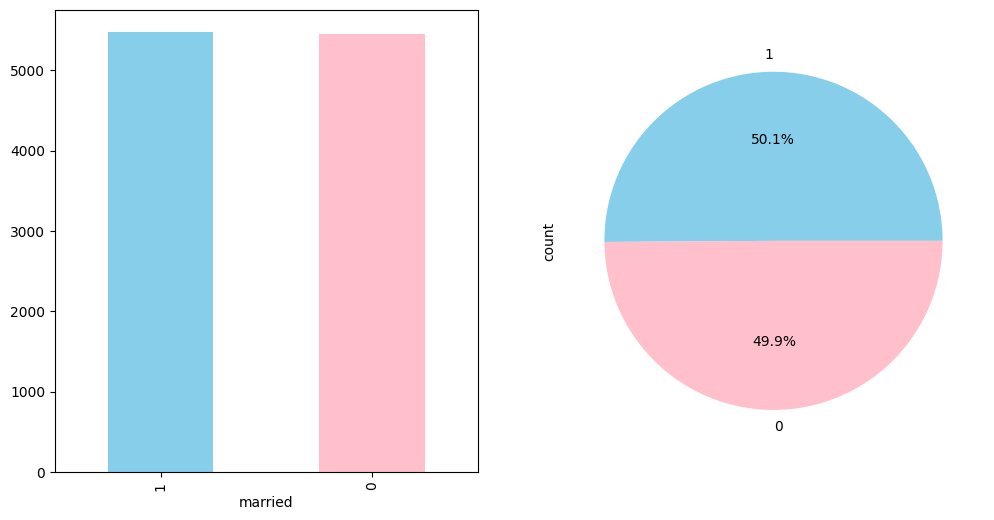

In [14]:
# married의 비율 시각화
new_married_count = y_resampled.value_counts()

# 막대 그래프
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
new_married_count.plot(kind='bar', color=['skyblue', 'pink'])

# 파이 차트
plt.subplot(1, 2, 2)
new_married_count.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'pink'])
plt.show()

> 기본적인 데이터셋 준비 완료

# Model Training

In [15]:
# lightgbm 모델 학습
from lightgbm import LGBMClassifier

params = {
    'n_estimators': 300,        #* 반복 수행하려는 트리의 개수 (너무 크면 오버피팅 발생)
    'max_depth': 8,             #* 트리의 최대 깊이 (너무 크면 오버피팅 발생)   # 보통 3~12(가장 민감하므로 먼저 튜닝해야할 값) # lightgbm처럼 leaf-wise로 학습하는 경우 끝까지(-1)도 괜찮다고 한다.
    # 'boosting_type' = 'gbdt'  # 부스팅 타입 (gbdt: Gradient Boosting Decision Tree, rf: RandomForest)
    'num_leaves': 16,           #* 하나의 트리가 가질 수 있는 최대 리프 수 (2번째로 민감. max_depth와 함께 튜닝)
    'learning_rate': 0.1,       # 부스팅 스탭 반복할 때 학습률(0~1) #튜닝시 0.1~0.3, 최종 모형은 0.05 이하
}

lgbm = LGBMClassifier(**params, objective='binary', metric='accuracy', random_state=42, verbose=0)
lgbm.fit(X_resampled, y_resampled)

LGBMClassifier(max_depth=8, metric='accuracy', n_estimators=300, num_leaves=16,
               objective='binary', random_state=42, verbose=0)

In [16]:
# Train data 성능 평가
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

y_train_pred = lgbm.predict(X_resampled)
print("<<Train Set Performance>>")
print("Accuracy: ", accuracy_score(y_resampled, y_train_pred))
print("F1 Score: ", f1_score(y_resampled, y_train_pred))
print(confusion_matrix(y_resampled, y_train_pred))

<<Train Set Performance>>
Accuracy:  0.9630544124371285
F1 Score:  0.9621722846441948
[[5393   63]
 [ 341 5138]]


In [20]:
# Test data 전처리
X_test.drop(duplicated_distribution_data, axis=1, inplace=True)
X_test_scaled = full_pipeline.transform(X_test)

In [21]:
X_test_scaled.shape

(1673, 20)

In [22]:
# Test data 성능 평가
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

y_test_pred = lgbm.predict(X_test_scaled)
print("<<Test Set Performance>>")
print("Accuracy: ", accuracy_score(y_test, y_test_pred))
print("F1 Score: ", f1_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

<<Test Set Performance>>
Accuracy:  0.8338314405260012
F1 Score:  0.42323651452282157
[[1293   77]
 [ 201  102]]
